2025-06-25 07:34:00.507163: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750836840.750159      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750836840.818886      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-25 07:34:19.493009: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
1500/1500 - 7s - 5ms/step - accuracy: 0.9215 - loss: 0.2706 - val_accuracy: 0.9533 - val_loss: 0.1524
Epoch 2/10
1500/1500 - 5s - 4ms/step - accuracy: 0.9653 - loss: 0.1151 - val_accuracy: 0.9634 - val_loss: 0.1218
Epoch 3/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9751 - loss: 0.0807 - val_accuracy: 0.9703 - val_loss: 0.0978
Epoch 4/10
1500/1500 - 5s - 4ms/step - accuracy: 0.9814 - loss: 0.0584 - val_accuracy: 0.9679 - val_loss: 0.1109
Epoch 5/10
1500/1500 - 5s - 4ms/step - accuracy: 0.9846 - loss: 0.0471 - val_accuracy: 0.9684 - val_loss: 0.1116
Epoch 6/10
1500/1500 - 5s - 4ms/step - accuracy: 0.9877 - loss: 0.0383 - val_accuracy: 0.9721 - val_loss: 0.0990
Epoch 7/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9898 - loss: 0.0310 - val_accuracy: 0.9743 - val_loss: 0.0935
Epoch 8/10
1500/1500 - 5s - 4ms/step - accuracy: 0.9922 - loss: 0.0240 - val_accuracy: 0.9702 - val_loss: 0.1214
Epoch 9/10
1500/1500 - 5s - 4ms/step - accuracy: 0.9922 - loss: 0.0239 - val_accuracy: 0.9714 - 

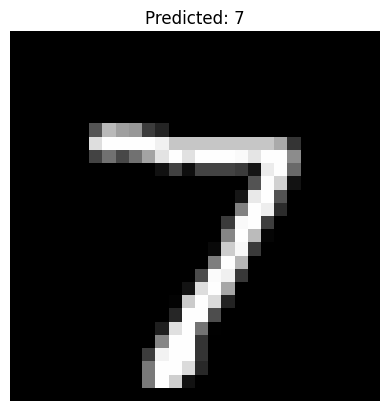

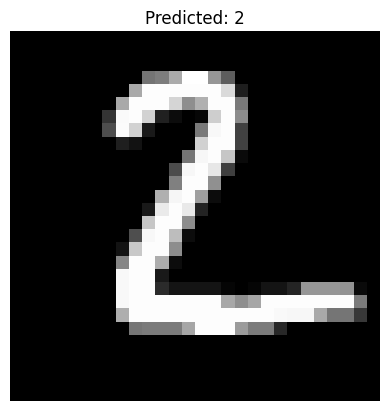

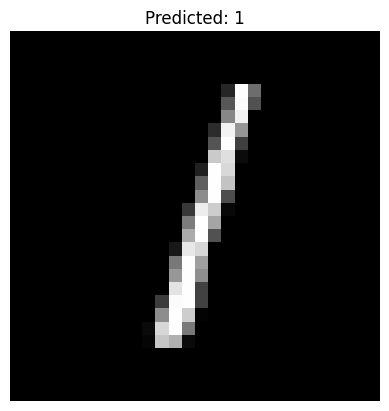

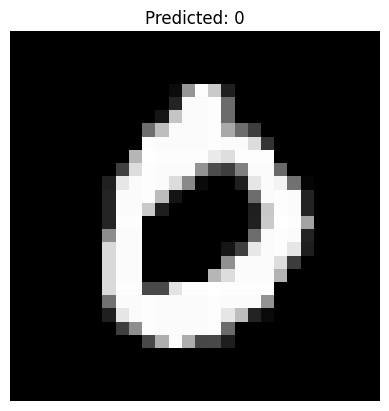

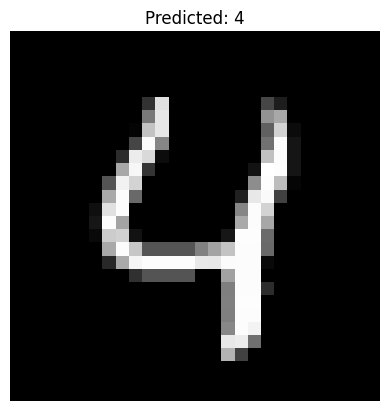

In [1]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Step 2: Load Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 3: Preprocess Data
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Step 4: Build ANN Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])

# Step 5: Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train Model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=2)

# Step 7: Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\n✅ Test Accuracy: {test_acc:.4f}')

# Step 8: Predict and Visualize
predictions = model.predict(x_test)

# Show some predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()
